# Домашнее задание 2. Классификация изображений.

В этом задании потребуется обучить классификатор изображений. Будем работать с датасетом, название которого раскрывать не будем. Можете посмотреть самостоятельно на картинки, которые в есть датасете. В нём 200 классов и около 5 тысяч картинок на каждый класс. Классы пронумерованы, как нетрудно догадаться, от 0 до 199. Скачать датасет можно вот [тут](https://yadi.sk/d/BNR41Vu3y0c7qA).

Структура датасета простая -- есть директории train/ и val/, в которых лежат обучающие и валидационные данные. В train/ и val/ лежат директориии, соответствующие классам изображений, в которых лежат, собственно, сами изображения.

__Задание__. Необходимо выполнить два задания

1) Добейтесь accuracy **на валидации не менее 0.44**. В этом задании **запрещено** пользоваться предобученными моделями и ресайзом картинок. 5 баллов

2) Добейтесь accuracy **на валидации не менее 0.84**. В этом задании делать ресайз и использовать претрейн можно. 5 баллов

Напишите краткий отчёт о проделанных экспериментах. Что сработало и что не сработало? Почему вы решили, сделать так, а не иначе? Обязательно указывайте ссылки на чужой код, если вы его используете. Обязательно ссылайтесь на статьи / блогпосты / вопросы на stackoverflow / видосы от ютуберов-машинлернеров / курсы / подсказки от Дяди Васи и прочие дополнительные материалы, если вы их используете.

Ваш код обязательно должен проходить все `assert`'ы ниже.

__Использовать внешние данные для обучения строго запрещено в обоих заданиях. Также запрещено обучаться на валидационной выборке__.


__Критерии оценки__: Оценка вычисляется по простой формуле: `min(10, 10 * Ваша accuracy / 0.44)` для первого задания и `min(10, 10 * (Ваша accuracy - 0.5) / 0.34)` для второго. Оценка округляется до десятых по арифметическим правилам.


__Советы и указания__:
 - Наверняка вам потребуется много гуглить о классификации и о том, как заставить её работать. Это нормально, все гуглят. Но не забывайте, что нужно быть готовым за скатанный код отвечать :)
 - Используйте аугментации. Для этого пользуйтесь модулем `torchvision.transforms` или библиотекой [albumentations](https://github.com/albumentations-team/albumentations)
 - Можно обучать с нуля или файнтюнить (в зависимости от задания) модели из `torchvision`.
 - Рекомендуем написать вам сначала класс-датасет (или воспользоваться классом `ImageFolder`), который возвращает картинки и соответствующие им классы, а затем функции для трейна по шаблонам ниже. Однако делать это мы не заставляем. Если вам так неудобно, то можете писать код в удобном стиле. Однако учтите, что чрезмерное изменение нижеперечисленных шаблонов увеличит количество вопросов к вашему коду и повысит вероятность вызова на защиту :)
 - Валидируйте. Трекайте ошибки как можно раньше, чтобы не тратить время впустую.
 - Чтобы быстро отладить код, пробуйте обучаться на маленькой части датасета (скажем, 5-10 картинок просто чтобы убедиться что код запускается). Когда вы поняли, что смогли всё отдебажить, переходите обучению по всему датасету
 - На каждый запуск делайте ровно одно изменение в модели/аугментации/оптимайзере, чтобы понять, что и как влияет на результат.
 - Фиксируйте random seed.
 - Начинайте с простых моделей и постепенно переходите к сложным. Обучение лёгких моделей экономит много времени.
 - Ставьте расписание на learning rate. Уменьшайте его, когда лосс на валидации перестаёт убывать.
 - Советуем использовать GPU. Если у вас его нет, используйте google colab. Если вам неудобно его использовать на постоянной основе, напишите и отладьте весь код локально на CPU, а затем запустите уже написанный ноутбук в колабе. Авторское решение задания достигает требуемой точности в колабе за 15 минут обучения.

Good luck & have fun! :)

In [ ]:
!pip install wandb
!pip3 install pytorch_lightning torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 248.6/248.6 kB 33.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.9/776.9 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 55.0 MB/s eta 0:00:00


**✨ Внимание ✨**

В этом домашнем задании предлагается использовать библиотеку `pytorch_lightning`. Доступ к ее [документации](https://lightning.ai/docs/pytorch/stable/) заблокирован с территории РФ. Вы можете:

1. Получить к ней доступ с помощью VPN.

2. Собрать документацию самостоятельно. Для этого склонируйте [github-репозиторий](https://github.com/Lightning-AI/lightning/tree/master), запустите в нем терминал (на windows – git bash) и выполните команды:

```shell
git submodule update --init --recursive
make docs
```
После этого откройте появившийся файл `docs/build/html/index.html`. Для работы команд в вашем окружении должен быть `pip`. Полная инструкция [по ссылке](https://github.com/Lightning-AI/lightning/tree/master/docs).

3. Гуглить `<error message> pytorch lightning` или `<how to do this> pytorch lightning`. Stack overflow на территории РФ все еще доступен 😉

4. Не пользоваться `pytorch_lightning` и написать цикл обучения модели самостоятельно. Например, по аналогии с функцией `fit` из [семинара 4](https://github.com/hse-ds/iad-deep-learning/blob/master/2023/seminars/04.%20Optim%20%26%20Lightning/04_Optim%26Lightning_solution.ipynb).

In [ ]:
# Возможно ниже будет не очень работать WandbLogger с первого разу, перезапустите kernel тетрадки
import wandb

wandb.login()

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
import math
import os
import random
import sys

import matplotlib.pyplot as plt
import numpy as np
import pytorch_lightning as pl
import torch
import torchvision
import torchvision.transforms as transforms
from PIL import Image
from pytorch_lightning.loggers import WandbLogger
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader
from torchmetrics.functional import accuracy as accrc
from torchvision.datasets import ImageFolder
from tqdm import tqdm
import albumentations as A
from albumentations.pytorch import ToTensorV2

# You may add any imports you need

In [ ]:
def seed_everything(seed):
    # Фискирует максимум сидов.
    # Это понадобится, чтобы сравнение оптимизаторов было корректным
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True


seed_everything(123456)

In [ ]:
!wget https://www.dropbox.com/s/33l8lp62rmvtx40/dataset.zip?dl=1 -O dataset.zip && unzip -q dataset.zip

--2023-11-18 16:01:58--  https://www.dropbox.com/s/33l8lp62rmvtx40/dataset.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/33l8lp62rmvtx40/dataset.zip [following]
--2023-11-18 16:01:58--  https://www.dropbox.com/s/dl/33l8lp62rmvtx40/dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc33fd050aec178a083128a1978c.dl.dropboxusercontent.com/cd/0/get/CHy0XcWIyj-_Du8MowaiXf39nIKNW1GlOV-46qRhUKEndbVx13ONvkDAdahTVaVxQFkFs6kJuZVq6nyBjrWl21CYltVoOb7I_LvQdEb2V7McJXW6IcY3W4hlnIv0Re1Totc_iFE-n3_2TI5kMasRSJcy/file?dl=1# [following]
--2023-11-18 16:01:58--  https://uc33fd050aec178a083128a1978c.dl.dropboxusercontent.com/cd/0/get/CHy0XcWIyj-_Du8MowaiXf39nIKNW1GlOV-46qRhUKEndbVx13ONvkDAdahTVaVxQFkFs6kJuZVq6nyBjrWl21CYltVoOb7I_LvQdEb

## Задание 0

### Что поможет сделать на 10 из 10 (одно задание - 5 баллов)

1. Использовать все возможные методы оптимизации и эксперемнтировать с ними.
2. Подбор learning rate. Пример из прошлого семинара как это делать: [Как найти lr](https://pytorch-lightning.readthedocs.io/en/1.4.5/advanced/lr_finder.html)

```
  trainer = pl.Trainer(accelerator="gpu", max_epochs=2, auto_lr_find=True)

  trainer.tune(module, train_dataloader, eval_dataloader)

  trainer.fit(module, train_dataloader, eval_dataloader))
```



3. Аугментация данных. [Документация (полезная)](https://pytorch.org/vision/main/transforms.html), а также [библиотека albumentation](https://towardsdatascience.com/getting-started-with-albumentation-winning-deep-learning-image-augmentation-technique-in-pytorch-47aaba0ee3f8)
4. Подбор архитектуры модели.
5. Можно написать модель руками свою в YourNet, а можно импортировать не предобученную сетку известной архитектуры из модуля torchvision.models. Один из способов как можно сделать:

  * `torchvision.models.resnet18(pretrained=False, num_classes=200).to(device)`
  * Документация по возможным моделям и как их можно брать: [Документация (полезная)](https://pytorch.org/vision/stable/models.html)
6. Правильно нормализовывать данные при создании, пример [тык, но тут и в целом гайд от и до](https://www.pluralsight.com/guides/image-classification-with-pytorch)
7. Model Checkpointing. Сохраняйте свой прогресс (модели), чтобы когда что-то пойдет не так вы сможете начать с этого места или просто воспроизвести свои результаты модели, которые обучали.
 * Пример как можно с wandb тут: [Сохраняем лучшие модели в wandb](https://docs.wandb.ai/guides/integrations/lightning)
 * По простому можно так: [Сохраняем модели в pytorch дока](https://pytorch.org/tutorials/beginner/saving_loading_models.html)

### Подготовка данных

In [ ]:
class Transformer:
    def __init__(self, transforms):
        self.transforms = transforms

    def __call__(self, img, *args, **kwargs):
        return self.transforms(image=np.array(img))["image"]


Пришлось написать во избежание ошибки из-за каких-то непоняток с библиотекой albumentations. Пользовалась https://stackoverflow.com/questions/71476099/how-to-add-data-augmentation-with-albumentation-to-image-classification-framewor

In [ ]:
"""
#first augmentations
train_transform = A.Compose(
    [
        A.HorizontalFlip(p=0.5),
        A.augmentations.transforms.Normalize(),
        ToTensorV2(),
    ]
)
val_transform = A.Compose(
    [
        A.augmentations.transforms.Normalize(),
        ToTensorV2(),
    ]
) """



#second augmentations, на них лучший аккураси
train_transform = A.Compose(
    [
        A.SmallestMaxSize(max_size=160),
        A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.05, rotate_limit=15, p=0.5),
        A.RandomCrop(height=128, width=128),
        A.RGBShift(r_shift_limit=15, g_shift_limit=15, b_shift_limit=15, p=0.5),
        A.RandomBrightnessContrast(p=0.5),
        A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
        ToTensorV2(),
    ]
)

val_transform = A.Compose(
    [
        A.SmallestMaxSize(max_size=160),
        A.CenterCrop(height=128, width=128),
        A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
        ToTensorV2(),
    ]
)










train_dataset = ImageFolder('/content/dataset/dataset/train', transform=Transformer(train_transform))
val_dataset = ImageFolder('/content/dataset/dataset/val', transform=Transformer(val_transform))


train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2
)
val_dataloader = DataLoader(val_dataset, batch_size=256, shuffle=True, num_workers=2
)

In [ ]:
# Just very simple sanity checks
assert isinstance(train_dataset[0], tuple)
assert len(train_dataset[0]) == 2
assert isinstance(train_dataset[1][1], int)
print("tests passed")

tests passed


### Посмотрим на картиночки

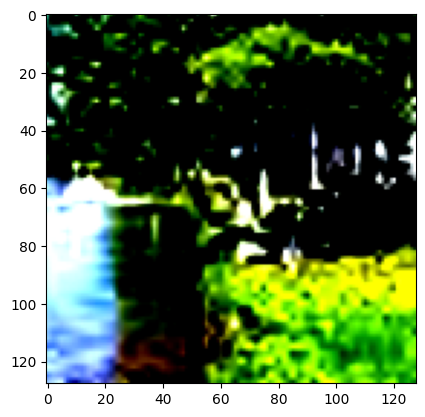

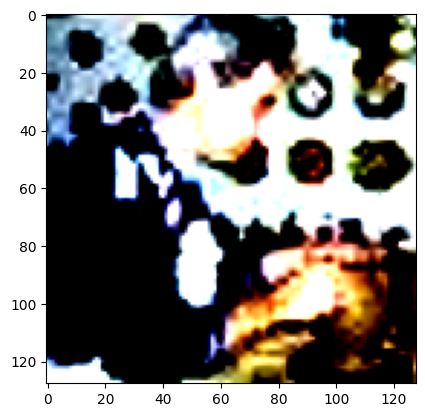

In [ ]:
for batch in val_dataloader:
    images, class_nums = batch
    plt.imshow(images[5].permute(1, 2, 0))
    plt.show()
    plt.imshow(images[19].permute(1, 2, 0))
    plt.show()
    break

## Задание 1.

5 баллов
Добейтесь accuracy на валидации не менее 0.44. В этом задании запрещено пользоваться предобученными моделями и ресайзом картинок.


Для того чтобы выбить скор (считается ниже) на 2.5/5 балла (то есть половину за задание) достаточно соблюдать пару простых жизненных правил:
1. Аугментация (без нее сложно очень будет)
2. Оптимайзеры можно (и нужно) использовать друг с другом. Однако когда что-то проверяете, то не меняйте несколько параметров сразу - собьете логику экспериментов
3. Не используйте полносвязные модели или самые первые сверточные, используйте более современные архитектуры (что на лекциях встречались)
4. Посмотреть все ноутбуки прошедших семинаров и слепить из них что-то общее. Семинарских тетрадок хватит сверх

### Модель (или просто импортируйте не предобученную)

In [ ]:
from torchvision.models import resnet18


In [ ]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

### Тренировочный класс lightning

In [ ]:
model1 = resnet18(pretrained=False, num_classes=200)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Пользовалась в т.ч. этим [видео](https://www.youtube.com/watch?v=DbESHcCoWbM)

In [ ]:
class YourModule(pl.LightningModule):
    def __init__(self, model, learning_rate):
        super().__init__()
        self.model = model1.to(device)


        self.model.fc = nn.Identity()

        self.classifier = nn.Sequential(
            nn.Linear(512, 1024),
            nn.BatchNorm1d(1024),
            nn.ReLU(),
            nn.Linear(1024, 200),

        ).to(device)

        self.loss = nn.CrossEntropyLoss()
        self.learning_rate = learning_rate


    def forward(self, x) -> torch.Tensor:
        result = self.model(x)
        #result = self.classifier(result)
        return result


    def configure_optimizers(self):
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr=self.learning_rate)
        #self.optimizer = torch.optim.SGD(self.model.parameters(), lr=self.learning_rate, momentum=0.9)
        self.scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(self.optimizer, verbose = True, patience = 2, threshold = 1e-3)

        return self.optimizer #, self.scheduler

    def training_step(self, train_batch, batch_idx) -> torch.Tensor:
        images, target = train_batch
        pred = self.model(images)
        loss = self.loss(pred, target)
        #acc = accuracy(torch.argmax(pred, dim=-1).long(), target.long(), task="multiclass", num_classes=200)
        #self.log("train_accuracy", acc, on_epoch=True, prog_bar=True)
        self.log("train_loss", loss, on_epoch=True, prog_bar=True)
        return loss


    def validation_step(self, val_batch, batch_idx):
        images, target = val_batch
        pred = self.model(images)
        loss = self.loss(pred, target)
        acc = accrc(torch.argmax(pred, dim=-1).long(), target.long(), task="multiclass", num_classes=200)
        self.log("val_accuracy", acc, on_epoch=True, prog_bar=True)
        self.log("val_loss", loss, on_epoch=True, prog_bar=True)
        return loss, acc

    def get_accuracy(self, reset=True):
        # return accuracy by all values till now
        if reset:
            self.targets = torch.Tensor()
            self.preds = torch.Tensor()
        return self.accrc


In [ ]:
from pytorch_lightning.callbacks import ModelCheckpoint

In [ ]:
checkpoint_callback = ModelCheckpoint(dirpath="best_params", save_top_k=2, monitor="val_accuracy")


In [ ]:
EPOCHS = 10
LR = 0.001

In [ ]:
wandb_logger = WandbLogger(log_model='all', project="iad_5s_hw2_1") # какие возможности дает с pytorch_lightning https://docs.wandb.ai/guides/integrations/lightning
#model = YourNet(pretrained = False)
module = YourModule(model=model1, learning_rate=LR)

checkpoint_callback = ModelCheckpoint(dirpath="best_params", save_top_k=2, monitor="val_loss")
trainer = pl.Trainer(logger=wandb_logger, max_epochs = 10, accelerator='gpu', devices=1, callbacks=[checkpoint_callback])
trainer.fit(module, train_dataloader, val_dataloader)
wandb.finish()
checkpoint_callback.best_model_path


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name       | Type             | Params
------------------------------------------------
0 | model      | ResNet           | 11.2 M
1 | classifier | Sequential       | 732 K 
2 | loss       | CrossEntropyLoss | 0     
------------------------------------------------
11.9 M    Trainable params
0         Non-trainable params
11.9 M    Total params
47.635    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.


epoch,▁▁▁▁▂▂▂▂▃▃▃▃▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▆▆▆▆▇▇▇▇████
train_loss_epoch,█▆▄▄▃▃▂▂▁▁
train_loss_step,█▇▆▆▆▆▆▅▅▄▃▄▃▃▃▄▃▃▂▄▃▂▃▃▂▂▂▂▁▂▂▂▁▂▂▂▂▂▁▂
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
val_accuracy,▁▃▅▆▆▇▇▇██
val_loss,█▆▄▃▂▂▁▁▁▁
epoch,9
train_loss_epoch,1.80683
train_loss_step,2.04774
trainer/global_step,15629
val_accuracy,0.484


'/content/best_params/epoch=9-step=15630.ckpt'

### Валидация результатов задания

In [ ]:
def evaluate_task(model, test_dataloader, device="cuda:0"):
    model = model.to(device)
    model.eval()
    accuracy = 0.0
    for images, labels in tqdm(test_dataloader):
        images, labels = images.to(device), labels.to(device)
        with torch.no_grad():
            pred = model.forward(images)
            acc_batch = accrc(pred, labels, task="multiclass", num_classes=pred.shape[1]).item()
        accuracy += acc_batch
    accuracy = accuracy / len(test_dataloader)
    return accuracy

In [ ]:
mdl= YourModule(model=model1, learning_rate=LR)

accuracy = evaluate_task(mdl, val_dataloader)
print(f"Оценка за это задание составит {np.clip(10 * accuracy / 0.44, 0, 10):.2f} баллов")


100%|██████████| 40/40 [00:08<00:00,  4.61it/s]

Оценка за это задание составит 10.00 баллов


## Задание 2

5 баллов
Добейтесь accuracy на валидации не менее 0.84. В этом задании делать ресайз и использовать претрейн можно.

Для того чтобы выбить скор (считается ниже) на 2.5/5 балла (то есть половину за задание) достаточно соблюдать пару простых жизненных правил:
1. Аугментация (без нее сложно очень будет)
2. Оптимайзеры можно (и нужно) использовать друг с другом. Однако когда что-то проверяете, то не меняйте несколько параметров сразу - собьете логику экспериментов
3. Не используйте полносвязные модели или самые первые сверточные, используйте более современные архитектуры (что на лекциях встречались или можете пойти дальше).
4. Попробуйте сначала посмотреть качество исходной модели без дообучения, сохраните как baseline. Отсюда поймете какие слои нужно дообучать.
5. Посмотреть все ноутбуки прошедших семинаров и слепить из них что-то общее. Семинарских тетрадок хватит сверх

### Модель (или просто импортируйте предобученную)

In [ ]:
train_transform = A.Compose(
    [
        A.Resize(240, 240), #в первом эксп было 240
        A.SmallestMaxSize(max_size=160),
        A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.05, rotate_limit=15, p=0.5),
        A.RandomCrop(height=128, width=128),
        A.RGBShift(r_shift_limit=15, g_shift_limit=15, b_shift_limit=15, p=0.5),
        A.RandomBrightnessContrast(p=0.5),
        A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
        ToTensorV2(),
    ]

)
val_transform = A.Compose(
    [
        A.Resize(240, 240),   #в первом эксп было 240
        A.SmallestMaxSize(max_size=160),
        A.CenterCrop(height=128, width=128),
        A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
        ToTensorV2(),
    ]
)


train_dataset = ImageFolder('/content/dataset/dataset/train', transform=Transformer(train_transform))
val_dataset = ImageFolder('/content/dataset/dataset/val', transform=Transformer(val_transform))
# REPLACE ./dataset/dataset WITH THE FOLDER WHERE YOU DOWNLOADED AND UNZIPPED THE DATASET

train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=4
) # YOUR CODE HERE
val_dataloader = DataLoader(val_dataset, batch_size=256, shuffle=True, num_workers=4
) # YOUR CODE HERE

### Тренировочный класс lightning

Тут я решила использовать другую архитектуру [EfficientNet-B1.](https://https://medium.com/@enrico.randellini/image-classification-resnet-vs-efficientnet-vs-efficientnet-v2-vs-compact-convolutional-c205838bbf49)

In [ ]:
model2 = torchvision.models.efficientnet_b1(pretrained=True)

In [ ]:
class YourModule(pl.LightningModule):
    def __init__(self, model, learning_rate):
        super().__init__()
        self.model = model2

        self.model.fc = nn.Identity()

        self.classifier = nn.Sequential(
            nn.Linear(1280, 200)
        ).to(device)

        self.loss = nn.CrossEntropyLoss()
        self.learning_rate = learning_rate


    def forward(self, x) -> torch.Tensor:
        result = self.model(x)
        #result = self.classifier(result)
        return result


    def configure_optimizers(self):
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr=self.learning_rate)
        # self.optimizer = torch.optim.SGD(self.model.parameters(), lr=self.learning_rate, momentum=0.9, weight_decay=)
        #self.scheduler = torch.optim.lr_scheduler.StepLR(self.optimizer, step_size=10, gamma=0.1)

        return self.optimizer #, self.scheduler

    def training_step(self, train_batch, batch_idx) -> torch.Tensor:
        images, target = train_batch
        pred = self.model(images)
        loss = self.loss(pred, target)
        #acc = accuracy(torch.argmax(pred, dim=-1).long(), target.long(), task="multiclass", num_classes=200)
        #self.log("train_accuracy", acc, on_epoch=True, prog_bar=True)
        self.log("train_loss", loss, on_epoch=True, prog_bar=True)
        return loss


    def validation_step(self, val_batch, batch_idx):
        images, target = val_batch
        pred = self.model(images)
        loss = self.loss(pred, target)
        acc = accrc(torch.argmax(pred, dim=-1).long(), target.long(), task="multiclass", num_classes=200)
        self.log("val_accuracy", acc, on_epoch=True, prog_bar=True)
        self.log("val_loss", loss, on_epoch=True, prog_bar=True)
        return loss, acc

    def get_accuracy(self, reset=True):
        # return accuracy by all values till now
        if reset:
            self.targets = torch.Tensor()
            self.preds = torch.Tensor()
        return self.accuracy

In [ ]:
EPOCHS = 10
LR = 0.001

In [ ]:
checkpoint_callback = ModelCheckpoint(dirpath="best_params", save_top_k=2, monitor="val_accuracy")


In [ ]:
wandb_logger = WandbLogger(log_model='all', project="iad_5s_hw2-part2")
module = YourModule(model=model2, learning_rate=LR)

checkpoint_callback = ModelCheckpoint(dirpath="best_params", save_top_k=2, monitor="val_loss")
trainer = pl.Trainer(logger=wandb_logger, max_epochs = 10, accelerator='gpu', devices=1, callbacks=[checkpoint_callback])
trainer.fit(module, train_dataloader, val_dataloader)
wandb.finish()
checkpoint_callback.best_model_path


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name       | Type             | Params
------------------------------------------------
0 | model      | EfficientNet     | 7.8 M 
1 | classifier | Sequential       | 256 K 
2 | loss       | CrossEntropyLoss | 0     
------------------------------------------------
8.1 M     Trainable params
0         Non-trainable params
8.1 M     Total params
32.202    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

epoch,▁▁▁▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▅▅▅▅▅▅▅▆▆▆▆▆▆▆▇▇▇▇▇▇█
train_loss_epoch,█▄▃▂▂▁
train_loss_step,█▅▄▃▄▃▄▃▃▃▃▃▃▃▂▂▂▂▃▂▂▃▂▂▃▃▁▁▂▂▂▂▁▂▂▂▂▁▂▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
val_accuracy,▁▅▆▆██
val_loss,█▃▂▂▁▁
epoch,6
train_loss_epoch,1.14662
train_loss_step,0.68374
trainer/global_step,9649
val_accuracy,0.6476


'/content/best_params/epoch=4-step=7815-v2.ckpt'

In [ ]:
def evaluate_task(model, test_dataloader, device="cuda:0"):
    model = model.to(device)
    model.eval()
    accuracy = 0.0
    for images, labels in tqdm(test_dataloader):
        images, labels = images.to(device), labels.to(device)
        with torch.no_grad():
            pred = model.forward(images)
            acc_batch = accrc(pred, labels, task="multiclass", num_classes=pred.shape[1]).item()
        accuracy += acc_batch
    accuracy = accuracy / len(test_dataloader)
    return accuracy

In [ ]:
mdl= YourModule(model=model2, learning_rate=LR)

accuracy = evaluate_task(mdl, val_dataloader)
print('\n', accuracy)
print(f"Оценка за это задание составит {np.clip(10 * (accuracy - 0.5) / 0.34, 0, 10):.2f} баллов")



100%|██████████| 40/40 [00:12<00:00,  3.15it/s]


 0.6484375
Оценка за это задание составит 4.37 баллов


### Валидация результатов задания

# Отчёт об экспериментах

текст писать тут (или ссылочку на wandb/любой трекер экспреиментов) для каждого задания, то есть не обязательно именно тут рисовать графики, если вы используете готовые трекеры/мониторинги ваших моделей.

Эксперименты по первому заданию:
1. ResNet18 + Adam(0,001) +  ReduceOnPlateau(patience = 2, threshold = 1e-3)
Тут аккураси начало падать уже на 11ой эпохе, поэтому я решила обучать на 10 эпохах. Оценка за это задание составит 8.81 баллов
2. ResNet18 + Adam(0,01) +  ReduceOnPlateau(patience = 2, threshold = 1e-3) Оценка за это задание составит 8.74 баллов
3. ResNet18 + SGD(0,001) +  ReduceOnPlateau(patience = 2, threshold = 1e-3) тут совсем все плохо
Оценка за это задание составит 6.06 баллов
4. ResNet18 + Adam(0,001) +  ReduceOnPlateau(patience = 2, threshold = 1e-3) + новые аугментации  Оценка за это задание составит 10.00 баллов
это победа


Результаты в репорте wandb по [ссылке](https://wandb.ai/ndhse/iad_5s_hw2_1/reports/1-task--Vmlldzo2MDEwNjg5)

По второму эксперименту:



1. efficientnet_b1 + Adam(0,009) + ресайз 224. Аккураси совсем маленькое тут получается,1 эпоха обучается примерно за 5 минут.

Accuracy  0.3005859375
Оценка за это задание составит 0.00 баллов

2. efficientnet_b1 + Adam(0,001) + новые аугментации + ресайз 224
стало немного лучше, но все равно плохо.

3. efficientnet_b1 +  Adam(0,001) + новые аугментации + ресайз 240
Accuracy 0.71123046875
Оценка за это задание составит 6.21 баллов
Тут уже лучше. Далее я решила вернуться к старым аугментациям. Тут эпоха обучается минут 15.


4. efficientnet_b1 +  Adam(0,001) ресайз 240


Accuracy 0.6484375
Оценка за это задание составит 4.37 баллов





Результаты в [репорте](https://api.wandb.ai/links/ndhse/sv1fmdmj)
